In [1]:
#Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
f1=pd.read_excel('winemag-data-v1.xlsx')

In [4]:
f2=pd.read_excel('winemag-data-v2.xlsx')

In [8]:
frames=[f1,f2]
df = pd.concat(frames, sort ='False')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 150929
Data columns (total 14 columns):
Unnamed: 0               280901 non-null int64
country                  280833 non-null object
description              280901 non-null object
designation              197699 non-null object
points                   280901 non-null int64
price                    258210 non-null float64
province                 280833 non-null object
region_1                 234594 non-null object
region_2                 111464 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  280900 non-null object
winery                   280901 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 32.1+ MB


Here are variables of this dataset
A country: The country that the wine is from
B description: A few sentences from a sommelier describing the wine’s taste, smell, look, feel, etc.
C designation: The vineyard within the winery where the grapes that made the wine are from
D points: The number of points WineEnthusiast rated the wine on a scale of 1–100 (though they say they only post reviews for wines that score >=80)
E price: The cost for a bottle of the wine
F province: The province or state that the wine is from
G region_1: The wine growing area in a province or state (ie Napa)
H region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
I variety: The type of grapes used to make the wine (ie Pinot Noir)
J winery: The winery that made the wine

In [10]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt', 'Albania', 'Lithuania', 'Japan', 'South Korea',
       'Montenegro', 'Tunisia', 'US-France'], dtype=object)

Precleaning EDA

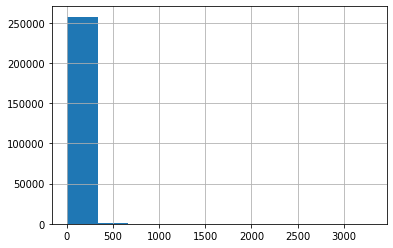

In [13]:
df['price'].hist()

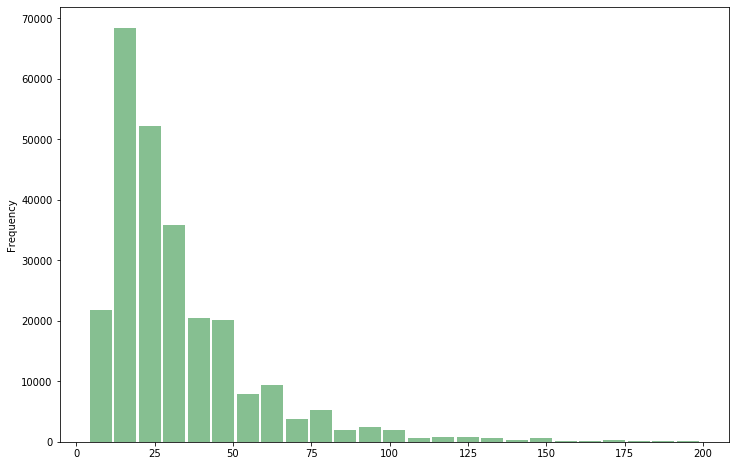

In [15]:
df[df['price'] < 200]['price'].plot.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


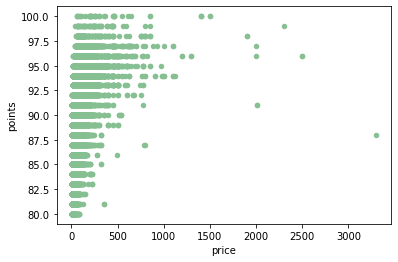

In [19]:
df.plot.scatter(x='price', y='points', color='#86bf91')

In [23]:
plt.figure(figsize=(15,10))
df.country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

TypeError: 'int' object is not callable

<Figure size 1080x720 with 0 Axes>

In [24]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

Unnamed: 0                                                         \
               count          mean           std     min       25%      50%   
country                                                                       
Albania          2.0   4753.000000    156.977705  4642.0   4697.50   4753.0   
Argentina     9431.0  74484.736931  41147.954310    16.0  38495.50  75327.0   
Armenia          2.0  37158.000000  40995.222746  8170.0  22664.00  37158.0   
Australia     7286.0  82419.007137  43161.632647    61.0  48274.75  85255.5   
Austria       6402.0  67777.658232  40994.702317    93.0  30279.00  66704.5   

                                points             ...                 price  \
                 75%       max   count       mean  ...    75%    max   count   
country                                            ...                         
Albania      4808.50    4864.0     2.0  88.000000  ...  88.00   88.0     2.0   
Argentina  111553.50  149638.0  9431.0  86.283851  ...  88.00   97.0  9343.0   
Armenia     51652.00   66146.0     2.0  87.500000  ...  87.75   88.0     2.0   
Australia  119380.00  150854.0  7286.0  88.112407  ...  90.00  100.0  7188.0   
Austria    103515.75  149531.0  6402.0  89.707591  ...  91.00   98.0  5282.0   

                                                                   
                mean        std   min    25%   50%    75%     max  
country                                                            
Albania    20.000000   0.000000  20.0  20.00  20.0  20.00    20.0  
Argentina  22.288451  21.624908   4.0  12.00  15.0  22.00   250.0  
Armenia    14.500000   0.707107  14.0  14.25  14.5  14.75    15.0  
Australia  32.592237  42.512889   5.0  15.00  20.0  35.00   850.0  
Austria    30.964597  27.849381   7.0  18.00  25.0  37.00  1100.0  

[5 rows x 24 columns]

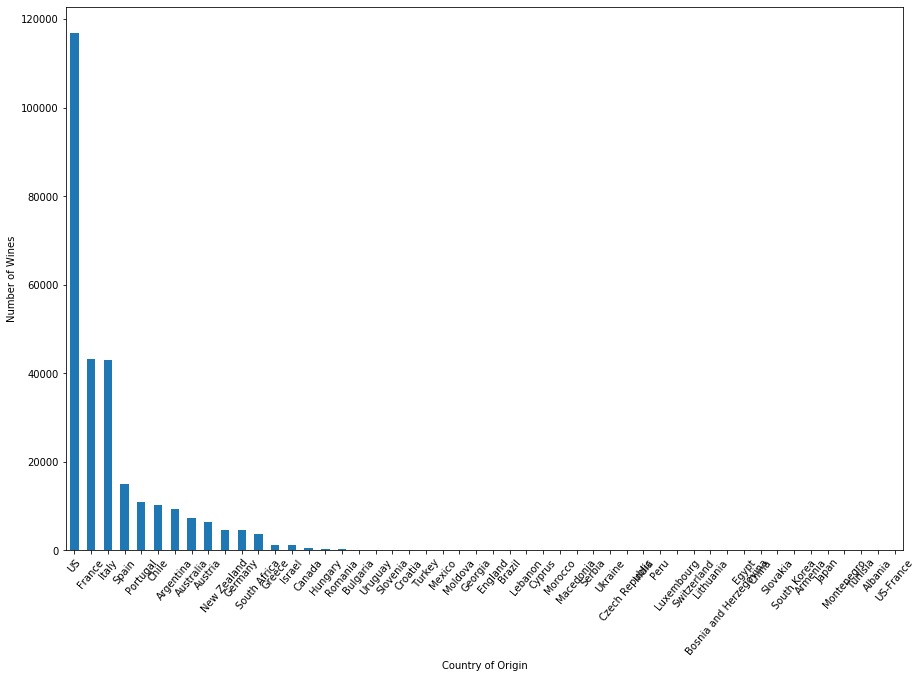

In [26]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
corrMatrix = df.corr()
print (corrMatrix)

            Unnamed: 0    points     price
Unnamed: 0    1.000000 -0.063021 -0.020996
points       -0.063021  1.000000  0.437456
price        -0.020996  0.437456  1.000000


In [40]:
description=[]
for row in df:
 description.append(row[2]) ##extract the data of country
 text=" ".join(description)

In [43]:
# import libraries
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image
from matplotlib import pyplot as plt

import random
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import numpy as np